In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd

import glob, os

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [4]:
plt.rcParams.update({'font.size': 16})

In [5]:
%%time
df = None
for stage in range(6):
    probfile = f'probs/fold_{0}_stage_{stage}_probabilities.csv'
    pf = pd.read_csv(probfile, index_col=0)
    if df is None:
        df = pd.DataFrame(index=pf.index.copy(), data={'actual':pf.actual.values})
    df[f's{stage+1}'] = pf.iloc[:,0]

CPU times: user 1.02 s, sys: 416 ms, total: 1.44 s
Wall time: 2.61 s


In [7]:
models = [
    'Presentation',
    'Access',
    'Cath Lab',
    'Medications',
    'PCI',
    'Closure'
]

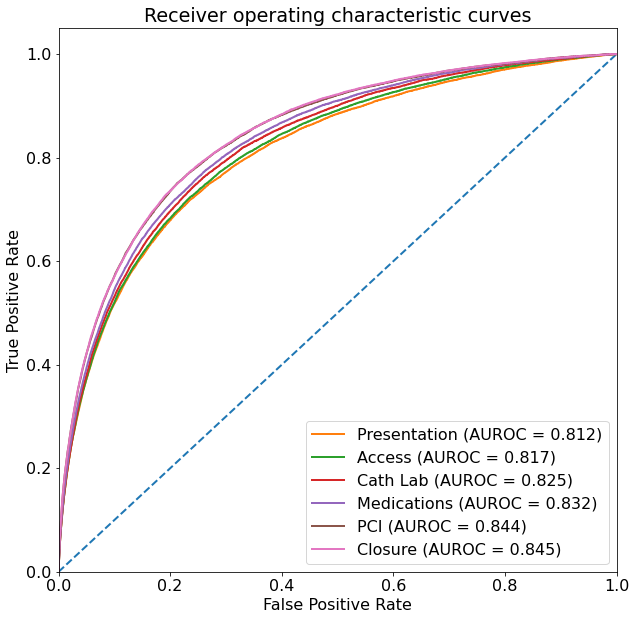

In [37]:
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], #color='navy',
         lw=2, linestyle='--')


for stage in range(1,7):
    fpr, tpr, thresh = roc_curve(df.actual, df[f's{stage}'], )
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, #color='darkorange',
             #lw=2, label=f'Model {stage} (AUROC = {roc_auc:.3f})')
             lw=2, label=f'{models[stage-1]} (AUROC = {roc_auc:.3f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves')
legend = plt.legend(loc="lower right")

#longest_legend = 0
#for t in legend.get_texts():
#    if len(t.get_text()) > longest_legend:
#        longest_legend = len(t.get_text())
#        
#for t in legend.get_texts():
#    t.set_text(t.get_text().rjust(longest_legend+3))
#    print(t.get_text())
#    t.set_ha('left')
#shift = max([t.get_window_extent().width for t in legend.get_texts()])
#for t in legend.get_texts():
#    t.set_ha('right') # ha is alias for horizontalalignment
#    t.set_position((shift,0))
    

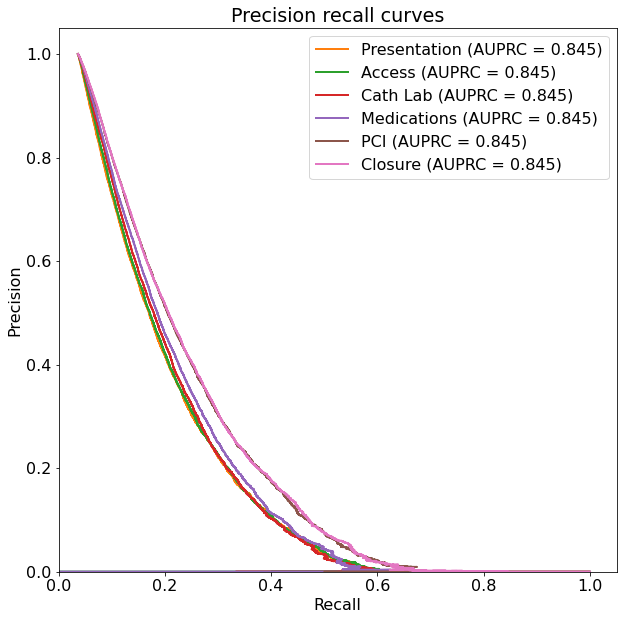

In [38]:
plt.figure(figsize=(10,10))
plt.plot([0, .00001], [0, .00001], #color='navy',
         lw=2, linestyle='--')


for stage in range(1,7):
    precision, recall, thresh = precision_recall_curve(df.actual, df[f's{stage}'], )
    prc_auc = average_precision_score(df.actual, df[f's{stage}'])
    #prc_auc = auc(precision, recall)
    plt.plot(precision, recall, #color='darkorange',
             #lw=2, label=f'Model {stage} (AUPRC = {roc_auc:.3f})')
             lw=2, label=f'{models[stage-1]} (AUPRC = {roc_auc:.3f})')

plt.xlim([0, 1.05])
plt.ylim([0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision recall curves')
plt.legend(loc="upper right")